In [2]:
import json
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import argparse

Using TensorFlow backend.


In [3]:
from keras import optimizers
from keras.datasets import imdb
from keras.models import Sequential, Model
from keras.layers import Dense, Input, Dropout, LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.utils import np_utils 

In [4]:
goodNames = np.load('encodings_goodnamesout.npy')
badNames = np.load('encodings_badnamesout.npy')

In [5]:
traintest_Y = np.zeros((1600,1))
traintest = np.zeros((1600,50))
for i in range(0,800):
    traintest[i*2,:] = goodNames[:,i]
    traintest[i*2+1,:]  = badNames[:,i]
    traintest_Y[i*2, 0] = 1
    traintest_Y[i*2+1,0] = 0

traintest_Y_cat = np_utils.to_categorical(traintest_Y, 2)

In [6]:
model = Sequential() 
model.add(Dense(40, input_dim =50, activation = 'relu'))
model.add(Dense(40, input_dim =40, activation = 'relu'))
model.add(Dense(40, input_dim =40, activation = 'relu'))
model.add(Dense(2, input_dim=50, activation='softmax')) 
batch_size = 100 
nb_epoch = 100
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) 
model.summary()
history = model.fit(traintest[:1500,:], traintest_Y_cat[:1500,:], batch_size=batch_size, nb_epoch=nb_epoch,verbose=1) 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 40)                2040      
_________________________________________________________________
dense_2 (Dense)              (None, 40)                1640      
_________________________________________________________________
dense_3 (Dense)              (None, 40)                1640      
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 82        
Total params: 5,402
Trainable params: 5,402
Non-trainable params: 0
_________________________________________________________________


/anaconda2/lib/python2.7/site-packages/keras/models.py:939: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/100
1500/1500 [==============================] - 0s 319us/step - loss: 0.6770 - acc: 0.6867
Epoch 2/100
1500/1500 [==============================] - 0s 17us/step - loss: 0.6255 - acc: 0.8480
Epoch 3/100
1500/1500 [==============================] - 0s 22us/step - loss: 0.5280 - acc: 0.8773
Epoch 4/100
1500/1500 [==============================] - 0s 19us/step - loss: 0.3684 - acc: 0.9207
Epoch 5/100
1500/1500 [==============================] - 0s 21us/step - loss: 0.2055 - acc: 0.9633
Epoch 6/100
1500/1500 [==============================] - 0s 20us/step - loss: 0.1110 - acc: 0.9807
Epoch 7/100
1500/1500 [==============================] - 0s 19us/step - loss: 0.0659 - acc: 0.9907
Epoch 8/100
1500/1500 [==============================] - 0s 19us/step - loss: 0.0367 - acc: 0.9927
Epoch 9/100
1500/1500 [==============================] - 0s 19us/step - loss: 0.0170 - acc: 1.0000
Epoch 10/100
1500/1500 [==============================] - 0s 18us/step - loss: 0.0095 - acc: 1.0000
Epoch 11

1500/1500 [==============================] - 0s 19us/step - loss: 3.7369e-05 - acc: 1.0000
Epoch 80/100
1500/1500 [==============================] - 0s 18us/step - loss: 3.6328e-05 - acc: 1.0000
Epoch 81/100
1500/1500 [==============================] - 0s 19us/step - loss: 3.5356e-05 - acc: 1.0000
Epoch 82/100
1500/1500 [==============================] - 0s 17us/step - loss: 3.4340e-05 - acc: 1.0000
Epoch 83/100
1500/1500 [==============================] - 0s 18us/step - loss: 3.3414e-05 - acc: 1.0000
Epoch 84/100
1500/1500 [==============================] - 0s 19us/step - loss: 3.2533e-05 - acc: 1.0000
Epoch 85/100
1500/1500 [==============================] - 0s 20us/step - loss: 3.1664e-05 - acc: 1.0000
Epoch 86/100
1500/1500 [==============================] - 0s 20us/step - loss: 3.0827e-05 - acc: 1.0000
Epoch 87/100
1500/1500 [==============================] - 0s 17us/step - loss: 3.0050e-05 - acc: 1.0000
Epoch 88/100
1500/1500 [==============================] - 0s 19us/step - loss

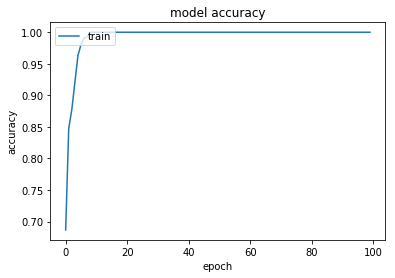

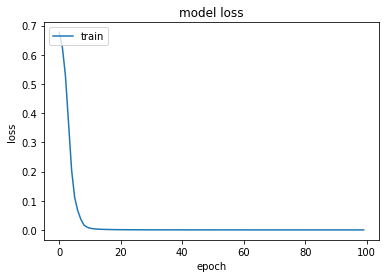

In [7]:
from matplotlib import pyplot as plt
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [12]:
scores = model.evaluate(traintest[1500:,:], traintest_Y_cat[1500:,:], verbose=1)
print('Test score:', scores[0]) 
print('Test accuracy:', scores[1])

100/100 [==============================] - 0s 332us/step
('Test score:', 0.012776668914593756)
('Test accuracy:', 1.0)
